<a href="https://colab.research.google.com/github/ankushbnayak/ML_Algos/blob/master/KNN_vs_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the following libraries before you start your analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Download the titanic_train dataset from https://www.kaggle.com/hesh97/titanicdataset-traincsv. 
After downloading import it using read_csv funtion of pandas.

In [ ]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we do the exploratory data analysis and thus data cleaning.
**Exploratory data analysis** (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
**Data cleansing** or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

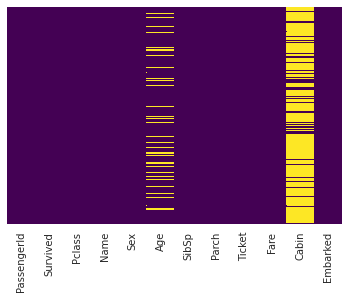

In [ ]:
#Heat map showing values which are not available or null
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


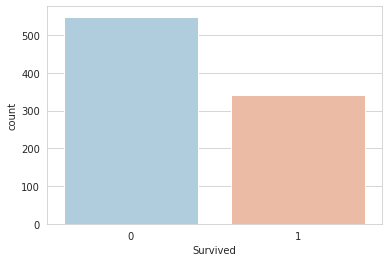

In [ ]:
#Count plot representing the count of people survived.
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

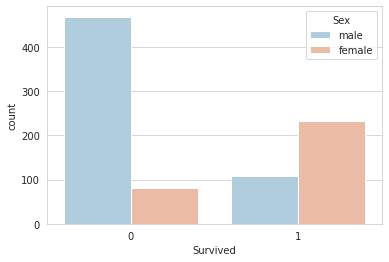

In [ ]:
# Count plot distinguishing between male and female who survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

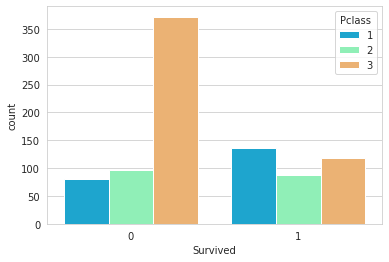

In [ ]:
# Count plot distinguishing passengers from different class who survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

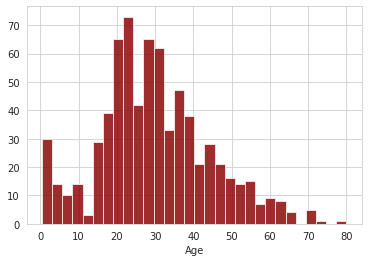

In [ ]:
#Histogram representing the people of various age groups who survived
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

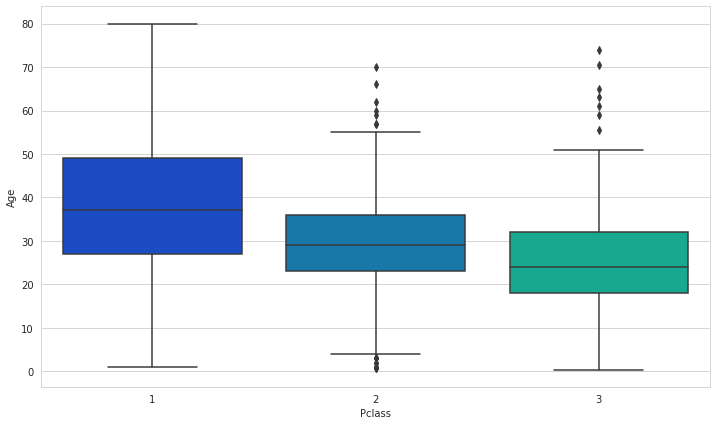

In [ ]:
#Box plot of age vs class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

From the above available data we can can predict the age group of the passenger having information of the passenger class which they belong.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

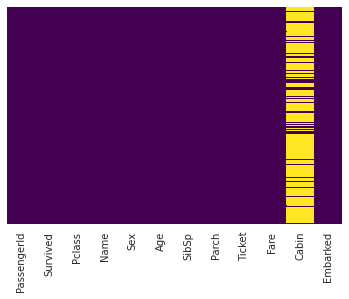

In [ ]:
#Applying the impute age function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Heat map after applying impute age function

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
#To get indicator values(0's and 1's) instead of categorical cariables
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 
KNN algorithm classifies an object depending on its distance from K nearest neighbours. 
So to avoid the dominance of a parameter of large value while calculating the Eucledian distance we standardize the values. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainx=pd.DataFrame(train.drop('Survived',axis=1))
scaler.fit(trainx)
scaled_features = scaler.transform(trainx)
df_feat = pd.DataFrame(scaled_features,columns=trainx.columns)
df_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-1.732505,0.825209,-0.531670,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.680232,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.453001,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.453001,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


Divide the dataset into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Survived'],
                                                    test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Let initially the value of k be 3. Fit the training dataset into the model.

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Print the confusion matrix and the classification report.

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[132  20]
 [ 34  81]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       152
           1       0.80      0.70      0.75       115

    accuracy                           0.80       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



Calculate the error rate for different values of K

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plot the error rate vs K graph

Text(0, 0.5, 'Error Rate')

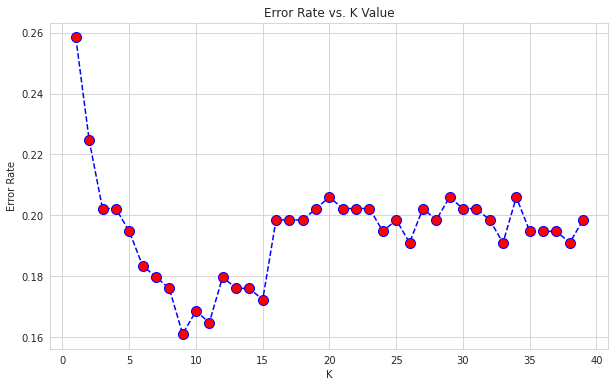

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

By referring the above graph we deduce that the K=9 has lowest error rate , hence the highest accuracy
 

In [95]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [96]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[141  11]
 [ 32  83]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       152
           1       0.88      0.72      0.79       115

    accuracy                           0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



Calculate accuracy for k=9

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8389513108614233


**Using logistic regression**

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [101]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
pred_2=logmodel.predict(X_test)
print(confusion_matrix(y_test,pred_2))

[[149  14]
 [ 39  65]]


In [104]:
print(accuracy_score(y_test,pred_2))

0.8014981273408239
